In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from statsmodels.stats.power import TTestIndPower
from scipy.stats import kstest

In [4]:
df = pd.read_excel('AB_Test_Results.xlsx')
df

D:\Anaconda\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0
...,...,...,...
9995,1981,control,0.0
9996,502,variant,0.0
9997,9214,variant,0.0
9998,7741,control,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


In [6]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995     True
9996    False
9997     True
9998    False
9999    False
Length: 10000, dtype: bool

In [7]:
df.duplicated().sum()

2067

In [9]:
df_fin = df.drop_duplicates()
df_fin

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0
...,...,...,...
9991,8864,variant,0.0
9992,9303,variant,0.0
9996,502,variant,0.0
9998,7741,control,0.0


In [10]:
df_fin['VARIANT_NAME'].value_counts()

control    3973
variant    3960
Name: VARIANT_NAME, dtype: int64

In [11]:
control = df_fin[df_fin['VARIANT_NAME'] == 'control']
control

,USER_ID,VARIANT_NAME,REVENUE
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
6,2849,control,0.0
7,9168,control,0.0
...,...,...,...
9983,9536,control,0.0
9986,2161,control,0.0
9988,428,control,0.0
9998,7741,control,0.0


In [12]:
test = df_fin[df_fin['VARIANT_NAME'] == 'variant']
test

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.00
4,6174,variant,0.00
5,2380,variant,0.00
8,6205,variant,0.00
13,2529,variant,2.15
...,...,...,...
9982,2259,variant,0.00
9990,4883,variant,0.00
9991,8864,variant,0.00
9992,9303,variant,0.00


In [13]:
df_fin[df_fin['VARIANT_NAME'] == 'control'].describe()

,USER_ID,REVENUE
count,3973.000000,3973.000000
mean,4988.320664,0.161842
std,2895.606855,3.367815
min,2.000000,0.000000
25%,2474.000000,0.000000
50%,4971.000000,0.000000
75%,7572.000000,0.000000
max,10000.000000,196.010000


In [14]:
df_fin[df_fin['VARIANT_NAME'] == 'variant'].describe()

,USER_ID,REVENUE
count,3960.000000,3960.000000
mean,4965.412374,0.088755
std,2889.255440,1.479239
min,3.000000,0.000000
25%,2442.750000,0.000000
50%,4958.500000,0.000000
75%,7425.000000,0.000000
max,10000.000000,58.630000


<Axes: xlabel='REVENUE', ylabel='Count'>

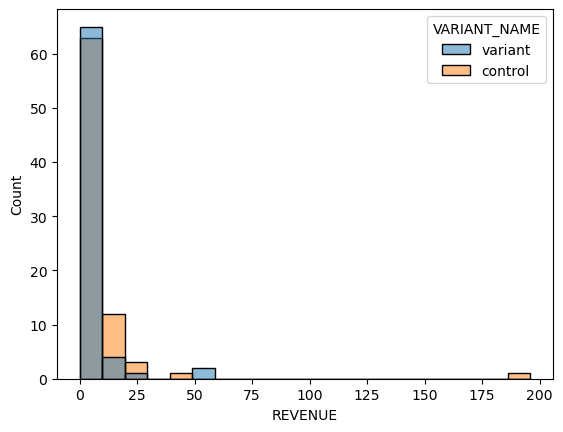

In [15]:
sns.histplot(data = df_fin[df_fin['REVENUE'] > 0], x = 'REVENUE', bins = 20, hue = 'VARIANT_NAME')

<Axes: xlabel='REVENUE', ylabel='VARIANT_NAME'>

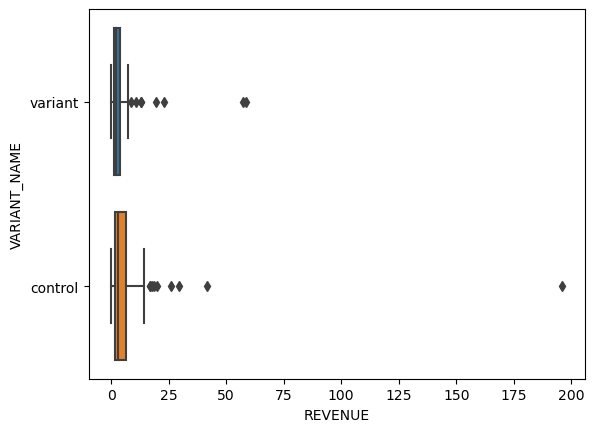

In [16]:
sns.boxplot(data = df_fin[df_fin['REVENUE'] > 0], x = 'REVENUE', y = 'VARIANT_NAME')

Прверка на нормальность с помощью теста Колмогорова-Смирнова:

In [17]:
alpha = 0.05
kstest(df_fin['REVENUE'], 'norm')

KstestResult(statistic=0.5, pvalue=0.0, statistic_location=0.0, statistic_sign=-1)

In [18]:
A = df.query('VARIANT_NAME == "control"')
B = df.query('VARIANT_NAME == "variant"')

In [19]:
mw_stats = mannwhitneyu(x = A['REVENUE'].values, y = B['REVENUE'].values)
mw_stats

MannwhitneyuResult(statistic=12521564.0, pvalue=0.47825247965294926)

Cтатистически значимых различий между группами нет 

In [20]:
M1, M2 = A['REVENUE'].mean(), B['REVENUE'].mean()
M1, M2

(0.12901284109149277, 0.07006977671451356)

In [21]:
D1, D2 = A['REVENUE'].var(), B['REVENUE'].var()
D1, D2

(9.045201594056255, 1.7287039831660465)

In [22]:
effect_size = (M1 - M2)/np.sqrt(D1/A.shape[0] + D2/B.shape[0])
effect_size

1.268403803110922

In [25]:
analysis = TTestIndPower()
analysis.solve_power(effect_size = effect_size, power = None, alpha = alpha, nobs1 = A.shape[0], ratio = B.shape[0]/A.shape[0])

1.0